In [109]:
# Load the packages
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 

# Customer Segmentation

In [110]:
df = pd.read_csv('C:/Users/DELL/Desktop/[RBAC 2023] Round 2 Dataset.csv')

In [111]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

last_date = df['TransactionDate'].max()

last_month = last_date.to_period('M')

df_filtered = df[df['TransactionDate'].dt.to_period('M') != last_month]

df = df_filtered

C:\Users\DELL\AppData\Local\Temp\ipykernel_1196\2015237899.py:5: UserWarning: Converting to Period representation will drop timezone information.
  last_month = last_date.to_period('M')
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [112]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1397197,1397197,1397197,Delivery,WEBSITE,2023-06-30 00:00:00+00:00,307336.0,1526475,Female,Yes,Hanoi
1397198,1397198,1397198,Take Away,STORE,2023-06-30 00:00:00+00:00,210907.0,48613,Female,No,Hanoi
1397199,1397199,1397199,Take Away,STORE,2023-06-30 00:00:00+00:00,237248.0,711050,Unknown,No,Hanoi
1397200,1397200,1397200,Delivery,CALL CENTER,2023-06-30 00:00:00+00:00,119985.0,2046935,Female,No,Ho Chi Minh City


In [113]:
# Calculate the Recency of the Customer
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TransactionDate'] = df['TransactionDate'].dt.tz_localize(None)

# print(df['TransactionDate'])

recent_purchase = df.groupby('CustomerID')['TransactionDate'].max()

now = datetime.now().replace(tzinfo=None)
recency = now - recent_purchase
recency = recency.dt.days

recency_df = pd.DataFrame({'CustomerID': recent_purchase.index, 'Recency': recency})

print(recency_df)

            CustomerID  Recency
CustomerID                     
0                    0      687
1                    1      614
8                    8      248
14                  14      168
16                  16      421
...                ...      ...
2174066        2174066      312
2174072        2174072      342
2174073        2174073      272
2174075        2174075      336
2174083        2174083      756

[718050 rows x 2 columns]


In [114]:
# Calculate the Frequency of the customers
frequency = df.groupby('CustomerID')['TransactionDate'].count()

frequency_df = pd.DataFrame({'CustomerID': frequency.index, 'Frequency': frequency})

print(frequency_df)

            CustomerID  Frequency
CustomerID                       
0                    0          1
1                    1          1
8                    8          2
14                  14          1
16                  16          1
...                ...        ...
2174066        2174066          1
2174072        2174072          3
2174073        2174073          1
2174075        2174075          1
2174083        2174083          1

[718050 rows x 2 columns]


In [115]:
# Monetary of the customer
total_spent_per_customer = df.groupby('CustomerID')['SalesAmount'].sum()

print(total_spent_per_customer)

CustomerID
0           411663.0
1           105503.0
8          1941696.0
14          267607.0
16          286558.0
             ...    
2174066     143685.0
2174072     953618.0
2174073     514503.0
2174075     262489.0
2174083     185271.0
Name: SalesAmount, Length: 718050, dtype: float64


In [116]:
# RFM Table"
RMF_Table = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': total_spent_per_customer})

print(RMF_Table)

            Recency  Frequency   Monetary
CustomerID                               
0               687          1   411663.0
1               614          1   105503.0
8               248          2  1941696.0
14              168          1   267607.0
16              421          1   286558.0
...             ...        ...        ...
2174066         312          1   143685.0
2174072         342          3   953618.0
2174073         272          1   514503.0
2174075         336          1   262489.0
2174083         756          1   185271.0

[718050 rows x 3 columns]


In [117]:
quantiles = RMF_Table.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.2: 234.0, 0.4: 364.0, 0.6: 505.0, 0.8: 636.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Monetary': {0.2: 177874.0,
  0.4: 266509.60000000003,
  0.6: 388299.39999999997,
  0.8: 734265.2000000004}}

In [118]:
# RFM Segmentation
rfmSegmentation = RMF_Table

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation
                                                                                       

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
0,687,1,411663.0,5,1,4,514
1,614,1,105503.0,4,1,1,411
8,248,2,1941696.0,2,4,5,245
14,168,1,267607.0,1,1,3,113
16,421,1,286558.0,3,1,3,313
...,...,...,...,...,...,...,...
2174066,312,1,143685.0,2,1,1,211
2174072,342,3,953618.0,2,5,5,255
2174073,272,1,514503.0,2,1,4,214


In [119]:
rfmSegmentation[rfmSegmentation['RFMClass'] == '111'].sort_values('Monetary', ascending=False)


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
77831,210,1,177874.0,1,1,1,111
681025,156,1,177871.0,1,1,1,111
1516622,212,1,177865.0,1,1,1,111
310353,223,1,177854.0,1,1,1,111
1920801,136,1,177845.0,1,1,1,111
...,...,...,...,...,...,...,...
667042,217,1,13538.0,1,1,1,111
1587936,231,1,13252.0,1,1,1,111
1607891,218,1,11911.0,1,1,1,111


In [120]:
rfmSegmentation[rfmSegmentation['RFMClass'] == '555'].sort_values('Monetary', ascending=False)


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
1967290,680,3,13874733.0,5,5,5,555
1945049,658,7,12346125.0,5,5,5,555
28417,687,3,11357602.0,5,5,5,555
1690824,716,3,11326286.0,5,5,5,555
1837523,685,14,10841095.0,5,5,5,555
...,...,...,...,...,...,...,...
484384,659,3,736282.0,5,5,5,555
694549,728,3,736212.0,5,5,5,555
1882385,663,3,736036.0,5,5,5,555


In [121]:
def segment(value):
    if value == '111':
        return 'High'
    elif value == '555':
        return 'Low'
    else:
        return 'Mid'

rfmSegmentation['Class'] = rfmSegmentation['RFMClass'].apply(segment)

print(rfmSegmentation)

            Recency  Frequency   Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                      
0               687          1   411663.0           5           1           4   
1               614          1   105503.0           4           1           1   
8               248          2  1941696.0           2           4           5   
14              168          1   267607.0           1           1           3   
16              421          1   286558.0           3           1           3   
...             ...        ...        ...         ...         ...         ...   
2174066         312          1   143685.0           2           1           1   
2174072         342          3   953618.0           2           5           5   
2174073         272          1   514503.0           2           1           4   
2174075         336          1   262489.0           2           1           2   
2174083         756         

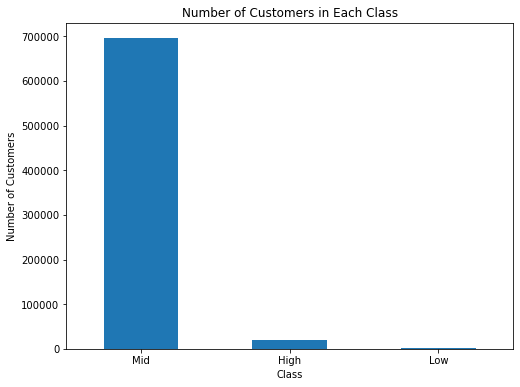

In [122]:
class_counts = rfmSegmentation['Class'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Number of Customers in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Churn Rate

In [123]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')

monthly_active_customers = df.groupby('Month')['CustomerID'].nunique()

previous_month_active = monthly_active_customers.shift(1)

active_customers_set = df.groupby('Month')['CustomerID'].apply(set)

first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('M')

new_customers = first_transaction.groupby(first_transaction).size()

churned_customers = active_customers_set.shift(1) - active_customers_set

churned_customers_count = churned_customers.apply(lambda x: len(x) if isinstance(x, set) else 0)

churn_rate = (churned_customers_count - new_customers) / previous_month_active

churn_rate.fillna(0, inplace=True)

print(churn_rate)

Month
2021-10    0.000000
2021-11    0.060734
2021-12   -0.034601
2022-01    0.124180
2022-02    0.203219
2022-03    0.212125
2022-04    0.323675
2022-05    0.210697
2022-06    0.263326
2022-07    0.314098
2022-08    0.355371
2022-09    0.412587
2022-10    0.345557
2022-11    0.442915
2022-12    0.313220
2023-01    0.235825
2023-02    0.520138
2023-03    0.324160
2023-04    0.418709
2023-05    0.385151
2023-06    0.391216
Freq: M, dtype: float64


In [125]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

monthly_active_customers = df.groupby('Quarter')['CustomerID'].nunique()

previous_month_active = monthly_active_customers.shift(1)

active_customers_set = df.groupby('Quarter')['CustomerID'].apply(set)

first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('Q')

new_customers = first_transaction.groupby(first_transaction).size()

churned_customers = active_customers_set.shift(1) - active_customers_set

churned_customers_count = churned_customers.apply(lambda x: len(x) if isinstance(x, set) else 0)

churn_rate = (churned_customers_count - new_customers) / previous_month_active

churn_rate.fillna(0, inplace=True)

print(churn_rate)

Quarter
2021Q4    0.000000
2022Q1   -0.043465
2022Q2    0.155897
2022Q3    0.211816
2022Q4    0.298279
2023Q1    0.177449
2023Q2    0.295718
Freq: Q-DEC, dtype: float64


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.to_period('Y')

monthly_active_customers = df.groupby('Month')['CustomerID'].nunique()

previous_month_active = monthly_active_customers.shift(1)

active_customers_set = df.groupby('Month')['CustomerID'].apply(set)

first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('Y')

new_customers = first_transaction.groupby(first_transaction).size()

churned_customers = active_customers_set.shift(1) - active_customers_set

churned_customers_count = churned_customers.apply(lambda x: len(x) if isinstance(x, set) else 0)

churn_rate = (churned_customers_count - new_customers) / previous_month_active

churn_rate.fillna(0, inplace=True)

print(churn_rate)